In [48]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tabulate import tabulate


os.chdir("C:/Users/KG961DH/Downloads")

# SNIS saneamento
data_18_22 = pd.read_excel("desagregado_snis_2018_2022.xlsx")
data_14_17 = pd.read_excel("snis_2014_2017.xlsx")

In [49]:
# Checking for identical columns
data_18_22.columns.equals(data_14_17.columns)

True

In [50]:
# Joining data frames

# Joining data frames
dfraw = pd.concat([data_18_22, data_14_17])

# Sorting
dfraw = dfraw.sort_values(by=['Código do Município', 'Ano de Referência'])

In [51]:
# Selecting columns of interest and renaming them 

rename_dict = {
    'Código do Município': 'codigo_mun',
    'Município': 'nome_mun',
    'Estado': 'uf',
    'Ano de Referência': 'ano',
    'Código do Prestador': 'codigo_prestador',
    'Prestador': 'nome_prestador',
    'Abrangência': 'abrangencia',
    'GE001 - Quantidade de municípios atendidos com abastecimento de água com delegação em vigor': 'quantidade_municipios_atendidos_agua',
    'GE014 - Quantidade de municípios atendidos com esgotamento sanitário com delegação em vigor': 'quantidade_municipios_atendidos_esgoto',
    'POP_TOT - População total do município do ano de referência (Fonte: IBGE):': 'populacao_municipio',
    'POP_URB - População urbana do município do ano de referência (Fonte: IBGE):': 'populacao_urbana_municipio',
    'AG001 - População total atendida com abastecimento de água': 'populacao_atendida_agua',
    'AG003 - Quantidade de economias ativas de água': 'economias_ativas_agua',
    'AG005 - Extensão da rede de água': 'extensao_rede_agua',
    'ES001 - População total atendida com esgotamento sanitário': 'populacao_atendida_esgoto',
    'ES003 - Quantidade de economias ativas de esgotos': 'economias_ativas_esgoto',
    'ES004 - Extensão da rede de esgotos': 'extensao_rede_esgoto',
    'FN005 - Receita operacional total (direta + indireta)': 'receita_operacional_total',
    'FN006 - Arrecadação total': 'arrecadacao_total',
    'FN010 - Despesa com pessoal próprio': 'despesa_pessoal_proprio',
    'FN011 - Despesa com produtos químicos': 'despesa_produtos_quimicos',
    'FN013 - Despesa com energia elétrica': 'despesa_energia_eletrica',
    'FN014 - Despesa com serviços de terceiros': 'despesa_terceiros',
    'FN017 - Despesas totais com os serviços (DTS), sendo FN017 = FN015 + FN016 + FN019 + FN022 + FN028': 'despesa_total',
    'FN023 - Investimento realizado em abastecimento de água pelo prestador de serviços': 'investimento_proprio_agua',
    'FN024 - Investimento realizado em esgotamento sanitário pelo prestador de serviços': 'investimento_proprio_esgoto',
    'FN033 - Investimentos totais realizados pelo prestador de serviços': 'investimento_proprio_total',
    'FN042 - Investimento realizado em abastecimento de água pelo(s) município(s)': 'investimento_municipio_agua',
    'FN043 - Investimento realizado em esgotamento sanitário pelo(s) município(s)': 'investimento_municipio_esgoto',
    'FN048 - Investimentos totais realizados pelo(s) município(s)': 'investimento_municipio_total',
    'FN052 - Investimento realizado em abastecimento de água pelo estado': 'investimento_estado_agua',
    'FN053 - Investimento realizado em esgotamento sanitário pelo estado': 'investimento_estado_esgoto',
    'FN058 - Investimentos totais realizados pelo estado': 'investimento_estado_total',
    'IN055 - Índice de atendimento total de água': 'cobertura_agua',
    'IN015 - Índice de coleta de esgoto': 'indice_coleta_esgoto',
    'IN046 - Índice de esgoto tratado referido à água consumida': 'indice_tratamento_esgoto',
    'IN004 - Tarifa média praticada': 'tarifa_media',
    'IN051 - Índice de perdas por ligação': 'indice_perdas_agua'
}

dfraw2 = dfraw.rename(columns=rename_dict).filter(items=rename_dict.values())

# Some municipatilies appear more than once, since there are more than one service provider in some municipalities
# Grouping by codigo_mun, uf, ano (Final dataframe)

df = dfraw2.groupby(['codigo_mun', 'nome_mun', 'uf', 'ano'], as_index=False).agg(
    populacao_municipio=('populacao_municipio', np.mean),
    populacao_urbana_municipio=('populacao_urbana_municipio', np.mean),
    populacao_atendida_agua=('populacao_atendida_agua', np.sum),
    economias_ativas_agua=('economias_ativas_agua', np.sum),
    extensao_rede_agua=('extensao_rede_agua', np.sum),
    populacao_atendida_esgoto=('populacao_atendida_esgoto', np.sum),
    economias_ativas_esgoto=('economias_ativas_esgoto', np.sum),
    extensao_rede_esgoto=('extensao_rede_esgoto', np.sum),
    receita_operacional_total=('receita_operacional_total', np.sum),
    arrecadacao_total=('arrecadacao_total', np.sum),
    despesa_pessoal_proprio=('despesa_pessoal_proprio', np.sum),
    despesa_produtos_quimicos=('despesa_produtos_quimicos', np.sum),
    despesa_energia_eletrica=('despesa_energia_eletrica', np.sum),
    despesa_terceiros=('despesa_terceiros', np.sum),
    despesa_total=('despesa_total', np.sum),
    investimento_proprio_agua=('investimento_proprio_agua',lambda x: np.sum(x)/1000000),
    investimento_proprio_esgoto=('investimento_proprio_esgoto',lambda x: np.sum(x)/1000000),
    investimento_proprio_total=('investimento_proprio_total', lambda x: np.sum(x)/1000000),
    investimento_municipio_agua=('investimento_municipio_agua', lambda x: np.sum(x)/1000000),
    investimento_municipio_esgoto=('investimento_municipio_esgoto',lambda x: np.sum(x)/1000000),
    investimento_municipio_total=('investimento_municipio_total',lambda x: np.sum(x)/1000000),
    investimento_estado_agua=('investimento_estado_agua', lambda x: np.sum(x)/1000000),
    investimento_estado_esgoto=('investimento_estado_esgoto', lambda x: np.sum(x)/1000000),
    investimento_estado_total=('investimento_estado_total',lambda x: np.sum(x)/1000000),
    cobertura_agua=('cobertura_agua', lambda x: np.sum(x)/100),
    indice_coleta_esgoto=('indice_coleta_esgoto', np.sum),
    indice_tratamento_esgoto=('indice_tratamento_esgoto', np.sum),
    tarifa_media=('tarifa_media', np.mean),
    indice_perdas_agua=('indice_perdas_agua', np.mean)
)


,codigo_mun,nome_mun,uf,ano,populacao_municipio,populacao_urbana_municipio,populacao_atendida_agua,economias_ativas_agua,extensao_rede_agua,populacao_atendida_esgoto,...,investimento_municipio_esgoto,investimento_municipio_total,investimento_estado_agua,investimento_estado_esgoto,investimento_estado_total,cobertura_agua,indice_coleta_esgoto,indice_tratamento_esgoto,tarifa_media,indice_perdas_agua
0,110001,Alta Floresta D Oeste,RO,2014,25652.0,14692.0,9982.0,2374.0,53.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.3891,0.00,0.00,3.58,725.38
1,110001,Alta Floresta D Oeste,RO,2015,25578.0,14649.0,10359.0,2345.0,53.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.4050,0.00,0.00,2.12,574.09
2,110001,Alta Floresta D Oeste,RO,2016,25506.0,14608.0,10359.0,2339.0,53.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.4061,0.00,0.00,2.62,588.77
3,110001,Alta Floresta D Oeste,RO,2017,25437.0,14569.0,10675.0,2386.0,53.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.4197,0.00,0.00,2.66,587.06
4,110001,Alta Floresta D Oeste,RO,2018,23167.0,13268.0,10975.0,2434.0,53.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.4737,0.00,0.00,2.65,576.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46851,530010,Brasília,DF,2019,3015268.0,2912087.0,2985115.0,1064497.0,9269.00,2698062.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.9900,82.28,82.28,5.09,300.67
46852,530010,Brasília,DF,2020,3055149.0,2950603.0,3024598.0,1084007.0,9390.00,2777130.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.9900,90.03,90.03,5.75,323.04
46853,530010,Brasília,DF,2021,3094325.0,2988438.0,3063382.0,1102562.0,9647.11,2839662.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.9900,86.65,86.65,6.21,327.39
46854,530010,Brasília,DF,2022,2817381.0,NaN,2788897.0,1116158.0,9681.55,2600435.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.9899,81.96,81.96,6.23,316.25


In [52]:
# Creating region variable 

conditions = [(df["uf"].isin(["SP", "RJ", "MG", "ES"])),
              (df["uf"].isin(["PR", "SC", "RS"])),
              (df["uf"].isin(["MT", "MS", "GO", "DF"])),
              (df["uf"].isin(["AC", "RO", "AM", "RR", "PA", "AP", "TO"])),
              (df["uf"].isin(["MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA"]))]

choices = ["sudeste", "sul", "centro_oeste", "norte", "nordeste"]

df["region"] = np.select(conditions, choices)

In [53]:
df_grouped = df.groupby(["ano", "region"]).agg(
    populacao_atendida_agua_total = ("populacao_atendida_agua", np.sum),
    populacao_atendida_esgoto_total = ("populacao_atendida_esgoto", np.sum),
    populacao_municipio_total=("populacao_municipio", np.sum),
    investimento_total=("investimento_municipio_total", np.sum)
).reset_index()

# Calculate mean coverage
df_grouped['cobertura_media_agua'] = df_grouped['populacao_atendida_agua_total'] / df_grouped['populacao_municipio_total']
df_grouped['cobertura_media_esgoto'] = df_grouped['populacao_atendida_esgoto_total'] / df_grouped['populacao_municipio_total']

df_grouped = df_grouped.dropna()
df_grouped = df_grouped[df_grouped['ano'] != '---']

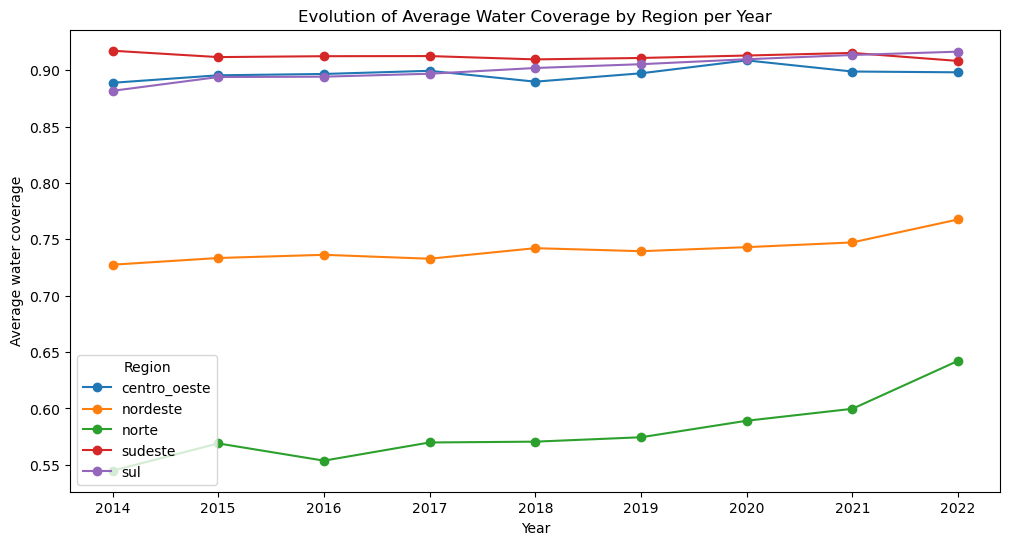

In [54]:
# Plot mean water coverage by region by year
df_pivot_cobertura = df_grouped.pivot(index='ano', columns='region', values='cobertura_media_agua')
df_pivot_cobertura.plot(figsize = (12,6), marker = "o")
plt.title("Evolution of Average Water Coverage by Region per Year")
plt.xlabel("Year")
plt.ylabel("Average water coverage")
plt.legend(title = "Region", loc = "lower left")
plt.show()

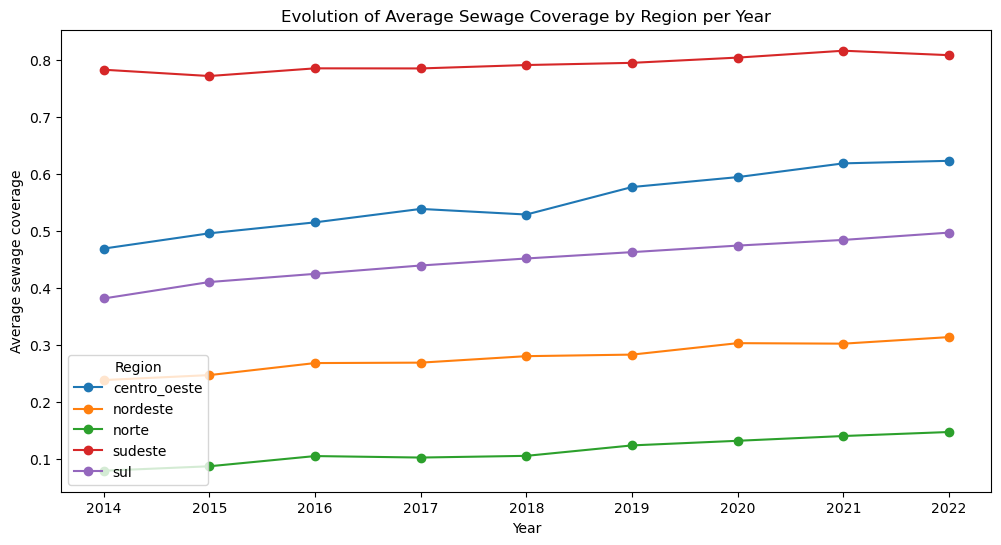

In [55]:
# Plot mean sewage coverage 
df_pivot_cobertura = df_grouped.pivot(index='ano', columns='region', values='cobertura_media_esgoto')
df_pivot_cobertura.plot(figsize = (12,6), marker = "o")
plt.title("Evolution of Average Sewage Coverage by Region per Year")
plt.xlabel("Year")
plt.ylabel("Average sewage coverage")
plt.legend(title = "Region", loc = "lower left")
plt.show()

In [58]:
# Creating moving average and first difference variables

def media_movel(x):
    return (x + x.shift(1)) / 2

# Agrupar por 'codigo_mun' e aplicar a média móvel
df['investimento_media_movel_agua'] = df.groupby('codigo_mun')['investimento_proprio_agua'].transform(media_movel)
df['investimento_media_movel_esgoto'] = df.groupby('codigo_mun')['investimento_proprio_esgoto'].transform(media_movel)
df['investimento_media_movel_total'] = df.groupby('codigo_mun')['investimento_proprio_total'].transform(media_movel)

def diff(x):
    return x - x.shift(1)

df['variacao_economias_ativas_agua'] = df.groupby('codigo_mun')['economias_ativas_agua'].transform(diff)
df['variacao_economias_ativas_esgoto'] = df.groupby('codigo_mun')['economias_ativas_esgoto'].transform(diff)
df['variacao_populacao'] = df.groupby('codigo_mun')['populacao_municipio'].transform(diff)

df = df.dropna()
df = df[df['ano'] != '---']

In [87]:
# Estimating the impact of investments on water and sewage coverage


# Only until 2020 because of covid shocks 
df_reg = df[df["ano"] < 2020]

ols_agua = smf.ols("variacao_economias_ativas_agua ~ investimento_media_movel_agua + variacao_populacao + C(uf)", data = df_reg).fit()
ols_esgoto = smf.ols("variacao_economias_ativas_esgoto ~ investimento_media_movel_esgoto + variacao_populacao + C(uf)", data = df_reg).fit()


# Extrair os coeficientes relevantes
coef_agua = ols_agua.params[['investimento_media_movel_agua', 'variacao_populacao']]
coef_esgoto = ols_esgoto.params[['investimento_media_movel_esgoto', 'variacao_populacao']]

# Extrair os valores p (p-values) relevantes
pvalues_agua = ols_agua.pvalues[['investimento_media_movel_agua', 'variacao_populacao']]
pvalues_esgoto = ols_esgoto.pvalues[['investimento_media_movel_esgoto', 'variacao_populacao']]

# Criar a tabela
table = pd.DataFrame({
    'OLS Water': [f'{coef_agua["investimento_media_movel_agua"]:.2f} ({pvalues_agua["investimento_media_movel_agua"]:.2f})', 
                 f'{coef_agua["variacao_populacao"]:.2f} ({pvalues_agua["variacao_populacao"]:.2f})'],
    'OLS Sewage': [f'{coef_esgoto["investimento_media_movel_esgoto"]:.2f} ({pvalues_esgoto["investimento_media_movel_esgoto"]:.2f})', 
                   f'{coef_esgoto["variacao_populacao"]:.2f} ({pvalues_esgoto["variacao_populacao"]:.2f})']
}, index=['Investment Coefficient', 'Population Increase'])

# Exibir a tabela usando tabulate
print(tabulate(table, headers='keys', tablefmt='pretty'))

+------------------------+--------------+---------------+
|                        |  OLS Water   |  OLS Sewage   |
+------------------------+--------------+---------------+
| Investment Coefficient | 47.99 (0.00) | 132.07 (0.00) |
|  Population Increase   | 0.27 (0.00)  |  0.25 (0.00)  |
+------------------------+--------------+---------------+
